In [1]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the chaosmagpy module
from chaosmagpy.model_utils import design_gauss, synth_values

Load SWARM datasættet SWARM.txt og plot 𝐵_𝜃, 𝐵_𝜑 og 𝐵_𝑟 som funktion af θ

In [2]:
# load SWARM data with pandas
swarm = pd.read_csv("SWARM_data.csv")
swarm.columns = ['theta', 'phi', 'radius', 'Bt', 'Bp', 'Br']

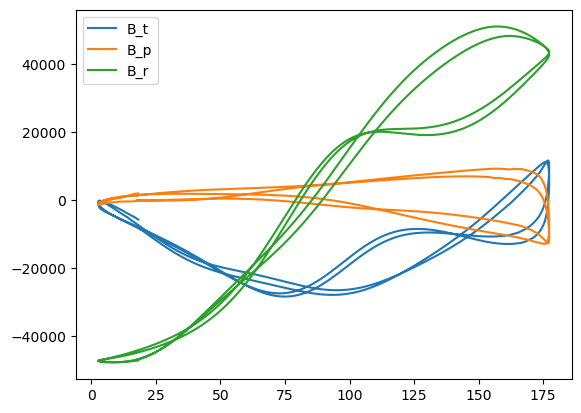

In [21]:
plt.plot(swarm.theta, swarm.Bt)
plt.plot(swarm.theta, swarm.Bp)
plt.plot(swarm.theta, swarm.Br)
plt.legend(["B_t", "B_p", "B_r"])